# Linear regression

#### linear regression on extended_boston dataset

In [1]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
print(X.shape, y.shape)

(506, 104) (506,)


/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

- The dataset consists of 506 data points described by 104 features
- The 104 features are the 13 original features together with the 91 possible combinations of two features within those 13 (all products between original features).
- The regression task associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s, using information such as crime rate, proximity to the Charles River, highway accessibility, and so on.


In [2]:
y # target variable : continuous variable. --> regression not classification

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Generally, there are no hyperparameters to be set
- Most arguments are for technical setting.

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) # same as LinearRegression().fit(X_train, y_train)

# 한 줄로 줄일 수 있다
# lr = LinearRegression().fit(X_train, y_train)

LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error

y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

print('performance for TRAIN--------')
print('train MSE : ', mean_squared_error(y_train, y_train_hat))

print('performance for TEST--------')
print('test MSE : ', mean_squared_error(y_test, y_test_hat))

performance for TRAIN--------
train MSE :  4.090362612543782
performance for TEST--------
test MSE :  32.06913512158287


Is this result good enough? **overfitting** or underfitting?

### Ridge regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html  
main argument?


In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [7]:
y_train_hat = ridge.predict(X_train)
y_test_hat = ridge.predict(X_test)

print('performance for TRAIN--------')
print('train MSE : ', mean_squared_error(y_train, y_train_hat))

print('performance for TEST--------')
print('test MSE : ', mean_squared_error(y_test, y_test_hat))

performance for TRAIN--------
train MSE :  9.742485553723814
performance for TEST--------
test MSE :  20.198582539263434


Compare it with the LinearRegression results. Which one is better? **Ridge**

#### varying the hyperparameter

In [11]:
training_mse = []
test_mse = []

alpha_settings = [0, 0.1, 1, 10]
for alpha in alpha_settings:
    '''TODO'''
#     Creating object
    ridge = Ridge(alpha = alpha)
#     training
    ridge.fit(X_train, y_train)
#     prediction
    y_train_hat = ridge.predict(X_train)
    y_test_hat = ridge.predict(X_test)
#     appending
    training_mse.append(mean_squared_error(y_train,y_train_hat))
    test_mse.append(mean_squared_error(y_test,y_test_hat))

In [16]:
import pandas as pd

pd.DataFrame({"alpha":alpha_settings, "training MSE": training_mse, "test MSE": test_mse})

,alpha,training MSE,test MSE
0,0.0,4.106419,32.109380
1,0.1,6.122797,18.610481
2,1.0,9.742486,20.198583
3,10.0,18.061570,29.743250


alpha = 0.1 일때 best

#### effect of the hyperparameter alpha on RidgeRegression

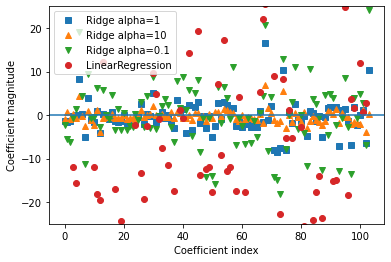

In [22]:
import matplotlib.pyplot as plt

ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- When α=10, the coefficients are mostly between around –3 and 3
- When α=0 (Linear Regression), the coefficients have larger magnitude

### Lasso

- varying the hyperparameter
- check the number of variables used for each iteration (variables whoose coefficient is not zero)

In [37]:
from sklearn.linear_model import Lasso

training_mse = []
test_mse = []
num_vars_used = []

alpha_settings = [0.0001, 0.001, 0.01, 0.1, 1]
for alpha in alpha_settings:
#    '''TODO'''
#     Creating object
    lasso = Lasso(alpha = alpha)
#     Training
    lasso.fit(X_train, y_train)
    
    num_vars_used.append(sum(lasso.coef_ !=0))
    
#     Prediction
    y_train_hat = lasso.predict(X_train)
    y_test_hat = lasso.predict(X_test)
#     Appending
    training_mse.append(mean_squared_error(y_train, y_train_hat))
    test_mse.append(mean_squared_error(y_test, y_test_hat))

/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.779e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

In [ ]:
#pd.DataFrame({"alpha":alpha_settings, "training MSE": training_mse, "test MSE": test_mse, "variables used": num_vars_used})

In [38]:
pd.DataFrame({"alpha":alpha_settings, "training MSE": training_mse, "test MSE": test_mse, "variables used": num_vars_used})

,alpha,training MSE,test MSE,variables used
0,0.0001,4.939931,24.701359,100
1,0.0010,5.505846,20.032808,76
2,0.0100,8.862482,18.970547,32
3,0.1000,19.535968,30.212214,8
4,1.0000,60.292646,64.593281,4


- alpha가 클수록 variables used가 작아짐

- alpha = 0.01이 가장 best

/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Coefficient magnitude')

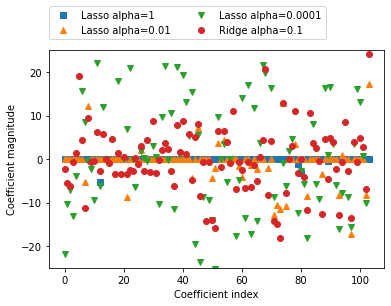

In [39]:
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=1000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

- Some coefficients are exactly zero(ex-alpha=1일때), meaning that some features are entirely ignored by the model

##### Logistic Regression

- **Regularization** can be used for logistic regression.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- main arguments
    - penalty : default L2 (similar to ridge)
    - penalty 파라미터를 l1으로 바꾸면 Lisso와 비슷함
    - C (inverse of alpha)

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

training_accuracy = []
test_accuracy = []

C_settings = [0.01, 0.1, 1, 10, 100, 1000, 10000]
for C in C_settings:
    '''TODO'''
#     Creating Object
    lr = LogisticRegression(C = C)
#     Training
    lr.fit(X_train, y_train)
#     Prediction
    y_train_hat = lr.predict(X_train)
    y_test_hat = lr.predict(X_test)

#     Appending
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    test_accuracy.append(accuracy_score(y_test,y_test_hat))

/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jeewonkim/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [43]:
pd.DataFrame({"C":C_settings, "training accuracy": training_accuracy, "test accuracy": test_accuracy})

,C,training accuracy,test accuracy
0,0.01,0.934272,0.930070
1,0.10,0.943662,0.937063
2,1.00,0.946009,0.958042
3,10.00,0.943662,0.958042
4,100.00,0.946009,0.958042
5,1000.00,0.948357,0.958042
6,10000.00,0.941315,0.958042


**Strengths**
- Linear models are very fast to train, and also fast to predict.
- They scale to very large datasets and work well with sparse data.
- They make it relatively easy to understand how a prediction is made.

**Weaknesses**
- If your dataset has highly correlated features, it is often not entirely clear why coefficients are the way they are. (It is important to remove redundant features – <U>**feature selection**</U>)
- They would perform worse if the relationship between features and target in your dataset is non-linear.

## Simulated example for bias-variance decompostion

In [ ]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
x_test= np.linspace(0,2,1000) # evenly spaced samples between start and stop)

In [ ]:
# True function we don't really know
def true_function(x):
    return np.sin(np.pi * x)

In [ ]:
y_true = true_function(x_test) # we don't know either. 

In [ ]:
plt.plot(x_test,y_true)

In [ ]:
# sample just 2 data points for training data
x_train = np.random.uniform(0,2,2)
y_train = true_function(x_train)
print(x_train)
print(y_train)

In [ ]:
# fit with constant function 
def constant_function(x_train, y_train, x_test): # it outputs average of y_train regardless of the value of x_test
    average_of_train_data = np.mean(y_train)    
    return np.repeat(average_of_train_data, len(x_test))

y_test = constant_function(x_train, y_train, x_test)

In [ ]:
plt.plot(x_test, y_true)
plt.plot(x_test, y_test)
plt.scatter(x_train, y_train, c='r')

In [ ]:
# fit with linear regression (line passing through the two training data points)
reg = LinearRegression().fit(x_train.reshape(-1,1), y_train)
y_test = reg.predict(x_test.reshape(-1,1))

In [ ]:
plt.plot(x_test, y_true)
plt.plot(x_test, y_test)
plt.scatter(x_train, y_train, c='r')

In [ ]:
# using linear regression,
# repeat the above procedure [sampling - training - test] for 1000 times. 
# Don't forget to save all the prediction results(y_test) for all iterations.

y_test_list = []
for i in range(1000):
    '''
    TODO
    
    
    
    
    

    '''
    y_test_list.append(y_test)
y_test_total = np.stack(y_test_list)

In [ ]:
# get the value of bias
'''TODO'''



In [ ]:
# get the value of variance
'''TODO'''



In [ ]:
# get the value of test error
'''TODO'''



In [ ]:
# check if the sum of bias and variance is equal to the test error
'''TODO'''



In [ ]:
# do the experiment again with the increased number of training instances. check the value of bias and variance again. 
'''TODO'''

